In [1]:
import pandas as pd

In [2]:
#reading features dataset
combined_data = pd.read_csv(r'..\data\raw\merged.csv',
                           parse_dates=["Date"])

CLEANING DATA

In [3]:
display(combined_data.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
# TWO COLUMNS OF IS HOLIDAY APPEAR IN THE COMBINED DATA FRAME, CHECK IF THEY ARE SAME AND DROP ONE OF THEM
are_columns_same = combined_data['IsHoliday_x'] == combined_data['IsHoliday_y']
# check if all values are True, indicating columns are same
if are_columns_same.all():
    print("Same columns")
else:
    print('Different columns')

Same columns


In [5]:
# drop one of them
combined_data = combined_data.drop('IsHoliday_y', axis = 1)
display(combined_data.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [6]:
# CHANGE THE NAMES OF THE COLUMNS TO LOWER CASE AND REMOVE WHITE SPACES
def change_col_names_to_lower_case(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function changes the case of the column names to lowercase.

    Args:
    - df (DataFrame): The input DataFrame.

    Returns:
    - DataFrame: A new DataFrame with lowercase column names.
    '''
    # Create a new DataFrame with lowercase column names
    #df1 = df.copy()
    df.columns = df.columns.str.lower()
    
    return df

In [7]:
combined_data = change_col_names_to_lower_case(combined_data)

In [8]:
#renaming col is holidayx to is holiday
combined_data = combined_data.rename(columns={'isholiday_x' :'isholiday'})
print(combined_data.columns)

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')


BAR PLOT OF NULL VALUES USING SEABORN

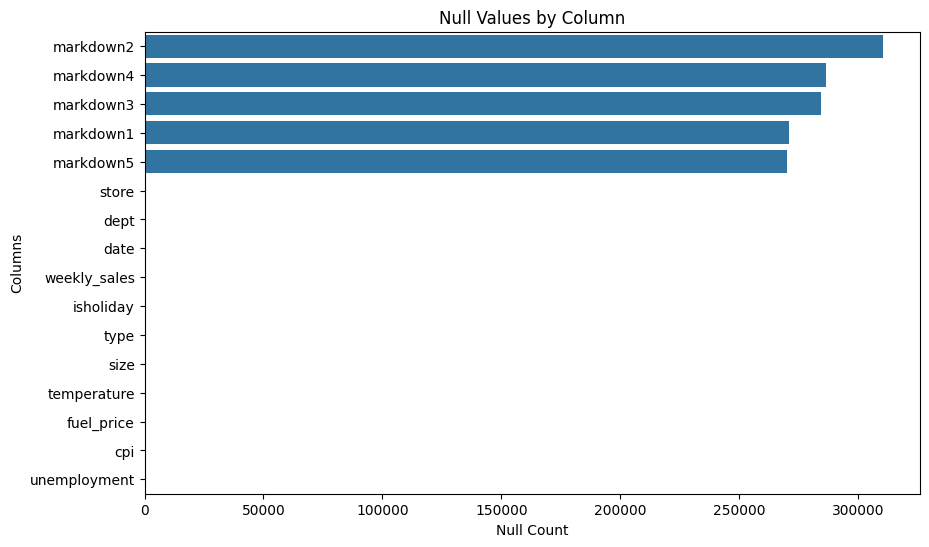

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# checking null values for each column
null_counts = combined_data.isnull().sum()

# Create a bar plot of null counts using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.values, y=null_counts.index, order=null_counts.sort_values(ascending = False).index)
plt.title('Null Values by Column')
plt.xlabel('Null Count')
plt.ylabel('Columns')
plt.savefig("../images/null_values_by_column.png")
plt.show()


In [10]:
# clearly markdown has null values 

In [11]:
#CHECKING UNIQUE VALUES IN ALL COLUMNS
def unique_value(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function caculates the uniques vales for all the columns

    Args:
    - df (DataFrame): The input DataFrame.

    Returns:
    - DataFrame: A new DataFrame with lowercase column names.
    '''
    # Create a new DataFrame with lowercase column names
    
    for col in df.columns:
        unique_val = df[col].unique()
        print("Unique values for" , col, "is" ,unique_val)

In [12]:
unique_value(combined_data)

Unique values for store is [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Unique values for dept is [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
Unique values for date is <DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]
Unique valu

Clearly markdown value has lot of nana and rest columns have numerical values whcih do not require formatting- we will handle them later in the question on markdown

Analysis requires impact on weekly sales on holiday or non holiday sales, so splitting data as per date,day,year,etc

In [13]:
# convert the date column into a datetime object
combined_data['date'] = pd.to_datetime(combined_data['date'])

# extract the day, month, and year components
combined_data['day'] = combined_data['date'].dt.day
combined_data['month'] = combined_data['date'].dt.month
combined_data['year'] = combined_data['date'].dt.year
# Define a mapping dictionary for month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Replace the integer values in the 'Month' column with month names
combined_data['month'] = combined_data['month'].map(month_mapping)
# show the modified data frame
display(combined_data.tail())

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,day,month,year
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,Sep,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,5,Oct,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,12,Oct,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,19,Oct,2012
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,26,Oct,2012


In [14]:
combined_data.describe()

,store,dept,date,weekly_sales,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,day,year
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,15.673131,2010.968591
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,2010.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,8.000000,2010.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,16.000000,2011.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,23.000000,2012.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,31.000000,2012.000000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,8.753549,0.796876


In [15]:
# Save the clean DataFrame to a CSV file
combined_data.to_csv(r"..\data\clean\clean.csv", index=False) 